In [56]:
import csv
import numpy as np
from matplotlib import pyplot as plt


In [57]:

class logodds_regress(object):

    def sigmoid(self,z):
        '''
        @param z:beta * xi
        '''
        return 1/(1 + np.exp(-z))

    def gradient_descent(self,xtrain,ytrain):
        '''
        梯度下降法求解beta
        @param xtrain:(x,1) shape[N,d+1]
        @param ytrain:label shape[N,1]
        @return beta (w,b) shape [1,d+1]
        '''
        beta = np.ones((1,3)) * 0.1
        z = np.dot(xtrain,beta.T)
        learn_rate = 0.05
        iter_max = 2000
        for i in range(iter_max):
            p1 = np.exp(z) / (1 + np.exp(z))
            #shape [N, N]
            p = np.diag((p1 * (1-p1)).reshape(-1))#生成对角阵
            #shape [N, 1] 一阶导数
            dl1 = -np.sum(xtrain * (ytrain - p1), 0, keepdims=True) #按列相加，保持矩阵的二维性
            beta -= dl1 * learn_rate
            z = np.dot(xtrain,beta.T)
        return beta
   
    def model(self, xtrain, ytrain, solver='gradient_descent'):

        if solver == 'gradient_descent':
            return self.gradient_descent(xtrain,ytrain)
        else:
            raise ValueError('Unknown method {}'.format(solver))

    def predict(self,beta,xtest):
        '''
        #我们以0.5为界，预测值y大于0.5则判断为好瓜，赋值1；反之判断为不是好瓜，赋值0 
        '''
        z = beta.dot(xtest.T)
        ypredict = self.sigmoid(z)
        ypredict[ypredict>0.5] = 1
        ypredict[ypredict<=0.5] = 0
        ypredict = ypredict.reshape(-1,1)
        return ypredict

def read_waremelon_data(filename):
    '''
    读取西瓜数据并转换
    @param filename:数据文件
    '''
    with open(filename,newline='',encoding='utf-8') as csvfile:
        data = csv.DictReader(csvfile)
        judge_to_num = {'1':1,'0':0}
        density = []     #密度
        sugar_rate = []  #含糖率
        y = []           #标签
        for item in data:
            density.append(float(item['密度']))
            sugar_rate.append(float(item['含糖率']))
            y.append(judge_to_num[item['好瓜']])
    density = np.array(density)
    sugar_rate = np.array(sugar_rate)
    xtrain = np.hstack((density.reshape(-1,1),sugar_rate.reshape(-1,1)))
    return (xtrain,y)
    

In [58]:
filename = '3.0a.csv'
xtrain,y = read_waremelon_data(filename)
print(xtrain,y)

[[0.697  0.46  ]
 [0.774  0.376 ]
 [0.634  0.264 ]
 [0.608  0.318 ]
 [0.556  0.215 ]
 [0.403  0.237 ]
 [0.481  0.149 ]
 [0.437  0.211 ]
 [0.666  0.091 ]
 [0.243  0.0267]
 [0.245  0.057 ]
 [0.343  0.099 ]
 [0.639  0.161 ]
 [0.657  0.198 ]
 [0.36   0.37  ]
 [0.593  0.042 ]
 [0.719  0.103 ]] [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[[0.666  0.091 ]
 [0.243  0.0267]
 [0.245  0.057 ]
 [0.343  0.099 ]
 [0.639  0.161 ]
 [0.657  0.198 ]
 [0.36   0.37  ]
 [0.593  0.042 ]
 [0.719  0.103 ]]
ypredict [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]]
准确率 [0.82352941]


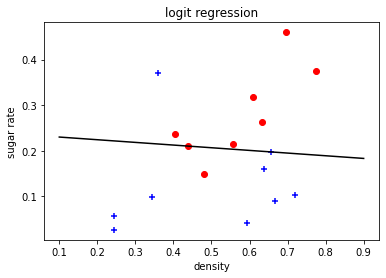

In [59]:
y = np.array(y)
data_label1 = xtrain[y == 1, :]
data_label0 = xtrain[y == 0, :]
print(data_label0)
plt.scatter(data_label1[:, 0], data_label1[:, 1], c='r', marker='o')
plt.scatter(data_label0[:, 0], data_label0[:, 1], c='b', marker='+')
xtrain = np.hstack((xtrain, np.ones([len(y), 1])))
#shape [N,1]
ytrain = y.reshape(-1, 1)
### 建模
A = logodds_regress()
beta = A.model(xtrain, ytrain, solver='gradient_descent')
ypredict = A.predict(beta, xtrain)
print('ypredict',ypredict)
print('准确率', sum(ytrain == ypredict)/len(ytrain))
###绘图直线方程w1x1+w2x2+b=0-->x2=-(w1x1+b)/w2
ymin = -(beta[0, 0]*0.1 + beta[0, 2]) / beta[0, 1]
ymax = -(beta[0, 0]*0.9 + beta[0, 2]) / beta[0, 1]
plt.plot([0.1, 0.9], [ymin, ymax], 'k-')
plt.xlabel('density')
plt.ylabel('sugar rate')
plt.title("logit regression")
plt.show()
